<a href="https://colab.research.google.com/github/apowell18/WorldSuicideAndHappinessAnalysis/blob/main/SuicideRates_vs_Happiness_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyzing suicide rates worldwide. I will also compare the suicidal rates with the world happiness ratings. This is for educational and learning purposes. 

# Preprocessing the Data

In [2]:
#import modules
import pandas as pd
import numpy as np
import seaborn as sns

#Connect URL
suicidal_url = "https://worldpopulationreview.com/country-rankings/suicide-rate-by-country"
happiness_url = "https://worldpopulationreview.com/country-rankings/happiest-countries-in-the-world"

In [3]:
#import URLs
sDf = pd.read_html(suicidal_url, header = 0) #suicidal dataframe
hDf = pd.read_html(happiness_url, header= 0) #happiness dataframe

In [ ]:
#checking the data frame
sDf

[                              Country  ...  2021 Population
 0                             Lesotho  ...          2159079
 1                              Guyana  ...           790326
 2                            Eswatini  ...          1172362
 3                         South Korea  ...         51305186
 4                            Kiribati  ...           121392
 ..                                ...  ...              ...
 174             Sao Tome And Principe  ...           223368
 175  Saint Vincent And the Grenadines  ...           111263
 176                           Grenada  ...           113021
 177                          Barbados  ...           287711
 178               Antigua And Barbuda  ...            98731
 
 [179 rows x 5 columns]]

In [13]:
#establish the dataset 
sData = sDf[0]
sData

,Country,Total Suicide Rate,Male Rate,Female Rate,2021 Population
0,Lesotho,72.4,116.0,30.1,2159079
1,Guyana,40.3,63.0,17.4,790326
2,Eswatini,29.4,55.1,4.7,1172362
3,South Korea,28.6,40.2,16.9,51305186
4,Kiribati,28.3,48.6,8.7,121392
...,...,...,...,...,...
174,Sao Tome And Principe,1.5,2.2,0.8,223368
175,Saint Vincent And the Grenadines,1.0,1.3,0.6,111263
176,Grenada,0.7,0.6,0.7,113021
177,Barbados,0.6,0.9,0.3,287711


In [ ]:
#checking the data frame
hDf

[     Rank      Country  Happiness 2021  Happiness 2020  2021 Population
 0       1      Finland           7.842           7.809          5548360
 1       2      Denmark           7.620           7.646          5813298
 2       3  Switzerland           7.571           7.560          8715494
 3       4      Iceland           7.554           7.504           343353
 4       5  Netherlands           7.464           7.449         17173099
 ..    ...          ...             ...             ...              ...
 141   142      Lesotho           3.512           3.653          2159079
 142   143     Botswana           3.467           3.479          2397241
 143   144       Rwanda           3.415           3.312         13276513
 144   145     Zimbabwe           3.145           3.299         15092171
 145   146  Afghanistan           2.523           2.567         39835428
 
 [146 rows x 5 columns]]

In [4]:
#establish dataset
hData = hDf[0]
hData

,Rank,Country,Happiness 2021,Happiness 2020,2021 Population
0,1,Finland,7.842,7.809,5548360
1,2,Denmark,7.620,7.646,5813298
2,3,Switzerland,7.571,7.560,8715494
3,4,Iceland,7.554,7.504,343353
4,5,Netherlands,7.464,7.449,17173099
...,...,...,...,...,...
141,142,Lesotho,3.512,3.653,2159079
142,143,Botswana,3.467,3.479,2397241
143,144,Rwanda,3.415,3.312,13276513
144,145,Zimbabwe,3.145,3.299,15092171


# Data Cleaning


In [ ]:
#Remove any nulls or N/As in datasets
sData = sData.dropna()
hData = hData.dropna()

#seperate the male and female suicuide rates and reserve for later usage
sDataNoGender = sData.drop(columns=["Male Rate", "Female Rate"])

#check datasets
print(sDataNoGender)
print(hData)
print(sData)




                              Country  Total Suicide Rate  2021 Population
0                             Lesotho                72.4          2159079
1                              Guyana                40.3           790326
2                            Eswatini                29.4          1172362
3                         South Korea                28.6         51305186
4                            Kiribati                28.3           121392
..                                ...                 ...              ...
174             Sao Tome And Principe                 1.5           223368
175  Saint Vincent And the Grenadines                 1.0           111263
176                           Grenada                 0.7           113021
177                          Barbados                 0.6           287711
178               Antigua And Barbuda                 0.4            98731

[179 rows x 3 columns]
     Rank      Country  Happiness 2021  Happiness 2020  2021 Population
0   

In [ ]:
#Export cleaned files 
from google.colab import files
hData.to_csv("HappinessDataSet.csv")
sData.to_csv("SuicideDataSet.csv")
files.download("HappinessDataSet.csv")
files.download("SuicideDataSet.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Data Exploration & Visualization


In [15]:
#merge datasets
mergedData = pd.merge(hData, sData)
mergedData.head()

,Rank,Country,Happiness 2021,Happiness 2020,2021 Population,Total Suicide Rate,Male Rate,Female Rate
0,1,Finland,7.842,7.809,5548360,15.3,23.2,7.6
1,2,Denmark,7.620,7.646,5813298,10.7,14.9,6.5
2,3,Switzerland,7.571,7.560,8715494,14.5,20.2,9.0
3,4,Iceland,7.554,7.504,343353,11.9,19.8,3.9
4,5,Netherlands,7.464,7.449,17173099,11.8,15.5,8.3


In [17]:
mergedDataDropped = mergedData.drop(columns=["Country", "Happiness 2020", "Male Rate", "Female Rate", "Rank", "2021 Population"])
mergedDataDropped.head()

,Happiness 2021,Total Suicide Rate
0,7.842,15.3
1,7.620,10.7
2,7.571,14.5
3,7.554,11.9
4,7.464,11.8


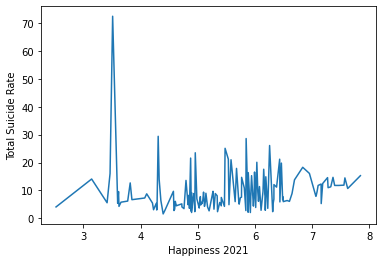

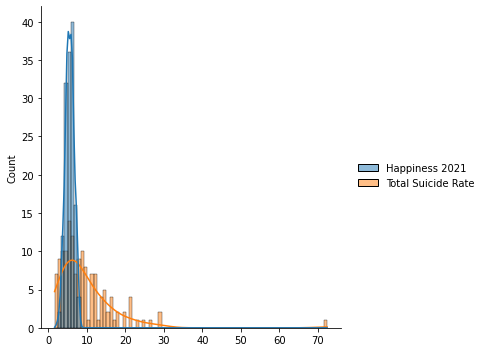

In [28]:
sns.lineplot(data=mergedDataDropped, x="Happiness 2021", y="Total Suicide Rate")

sns.displot(mergedDataDropped, kde=True)




The link to the Tableau Visualization: https://public.tableau.com/shared/NNWWP4R9X?:display_count=n&:origin=viz_share_link

There seems to be little correlation between worldwide happiness and suicide rates. Finland was ranked the highest in the Happiest Country, whereas Afghanistan was ranked the lowest. Lesotho was ranked the highest in suicidal rates and Antigua/Barbuda had the lowest suicidal ratings. When comparing the Female and Male suicidal rates, I noticed that the male suicidal rates were significantly higher. 